# Classification

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_train/255

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


## Building the Model
Here we define the model architecture

In [5]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

The above model could alternatively have been created as follows

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

## Compiling the Model
Here we specify the loss function and the optimiser, as well as a set of extra metrics to compute during training and evaluation.

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['sparse_categorical_accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0.9209 - val_loss: 0.3283 - val_sparse_categorical_accuracy: 0.8814
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2170 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.3175 - val_sparse_categorical_accuracy: 0.8896
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2124 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.3117 - val_sparse_categorical_accuracy: 0.8892
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2103 - sparse_categorical_accuracy: 0.9254 - val_loss: 0.3097 - val_sparse_categorical_accuracy: 0.8914
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2065 - sparse_categorical_accuracy: 0.9255 - val_loss: 0.3059 - val_sparse_categorical_accuracy: 0.8908
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2020 - spars

<AxesSubplot:xlabel='Epoch'>

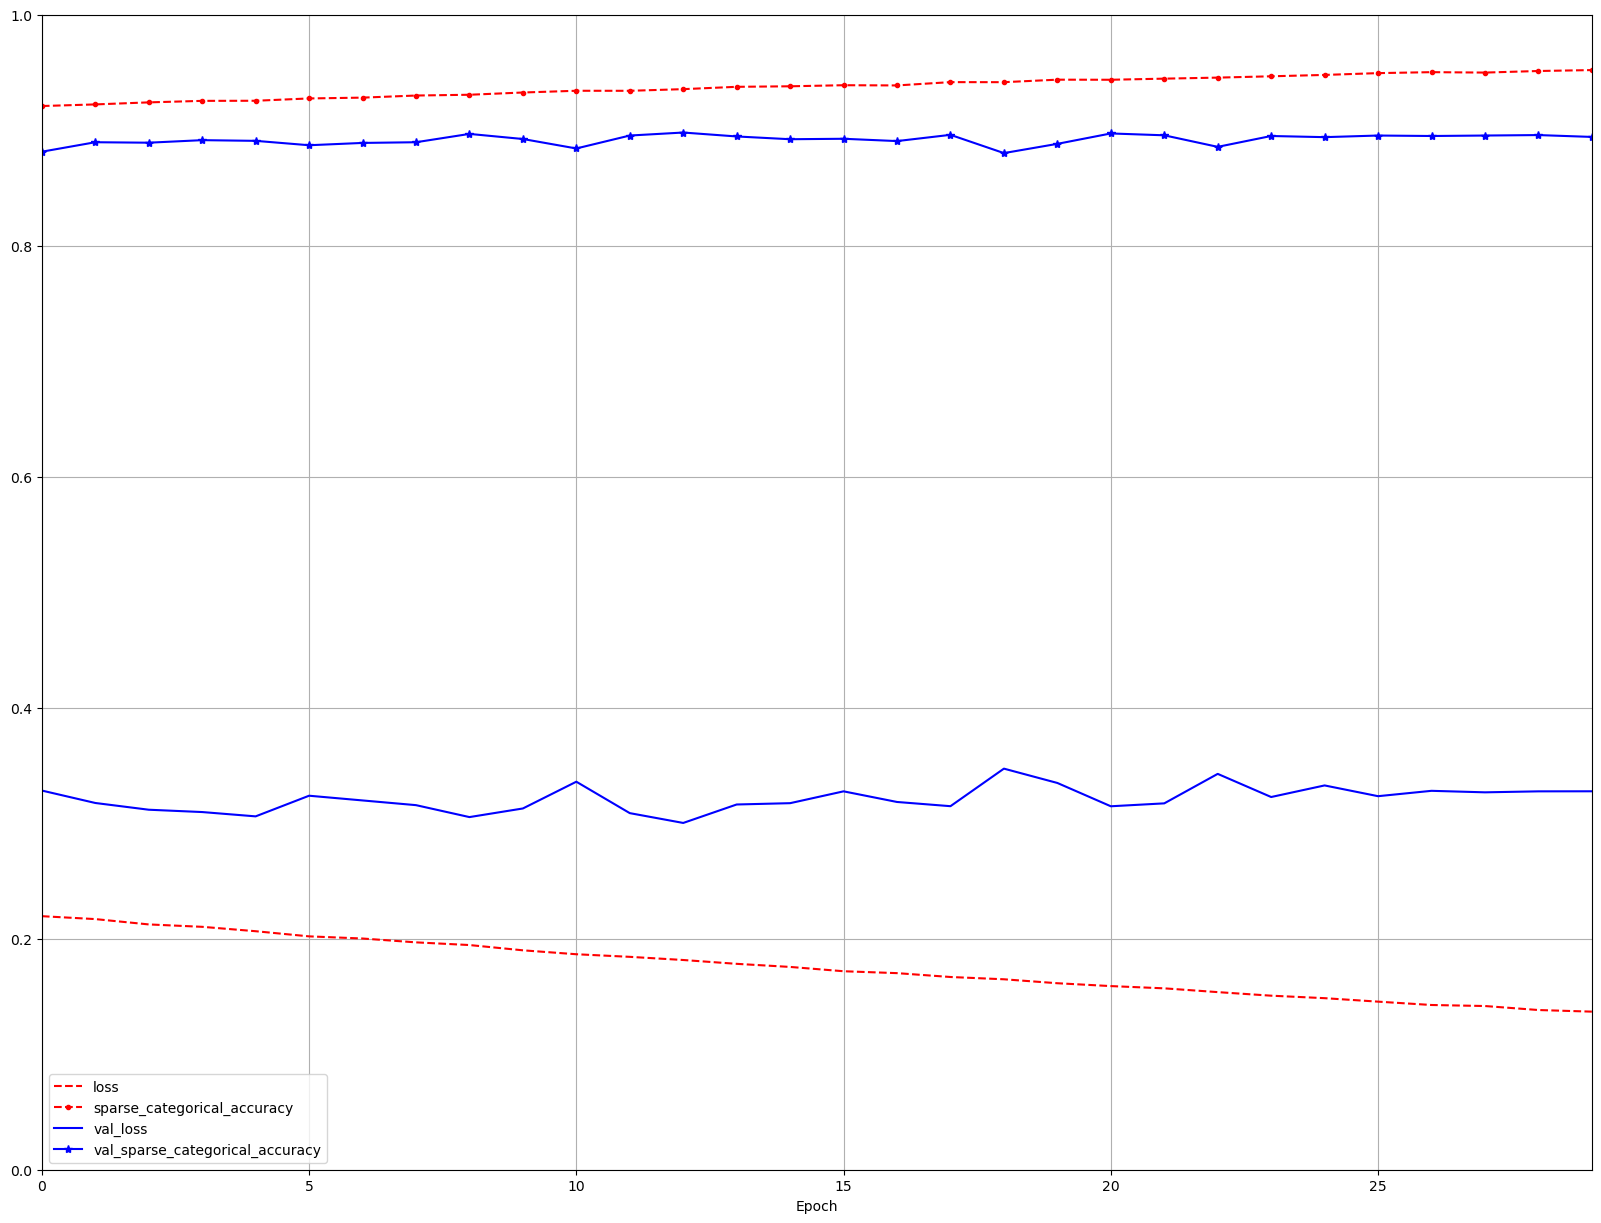

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(20,15), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*'])

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.81, 0.  , 0.  , 0.1 , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [29]:
y_pred

array([9, 0, 0], dtype=int64)

# Regression
We now swap to the california housing dataset to predict the price of the house. We thus only need a single neuron in the output layer, and it does not require an activation function. We will also be using a normalization layer instead of a standard scaler as in sklearn.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
tf.random.set_seed(42)
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [34]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8909 - root_mean_squared_error: 0.9439 - val_loss: 0.5187 - val_root_mean_squared_error: 0.7202
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3801 - root_mean_squared_error: 0.6165 - val_loss: 0.7047 - val_root_mean_squared_error: 0.8395
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3579 - root_mean_squared_error: 0.5982 - val_loss: 0.3353 - val_root_mean_squared_error: 0.5791
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3381 - root_mean_squared_error: 0.5815 - val_loss: 0.5129 - val_root_mean_squared_error: 0.7162
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714 - val_loss: 0.7694 - val_root_mean_squared_error: 0.8772
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3199 - root_mean_squared_error: 0.5656 - val_loss: 1.1970 - val_

# More Complex Models with the Functional API
Let's build a wide-and-deep neural network. 
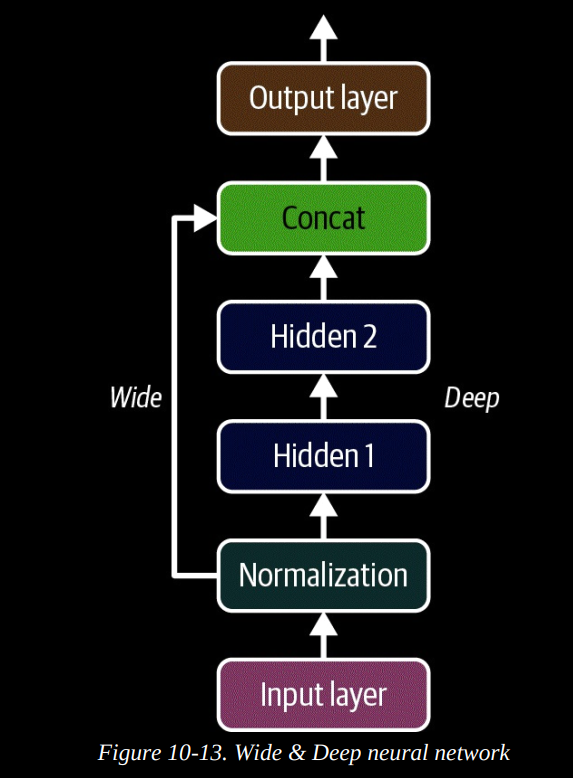

In [3]:
norm_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# Note that is is called functional due to the way we are calling the layers sequentially like functions and passing args
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = norm_layer(input_)
hidden_1 = hidden_layer1(normalized)
hidden_2 = hidden_layer2(hidden_1)
concat = concat_layer([normalized, hidden_2])
output = output_layer(concat)

model  = tf.keras.Model(inputs=[input_], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5024 - root_mean_squared_error: 1.2257 - val_loss: 0.6012 - val_root_mean_squared_error: 0.7753
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4635 - root_mean_squared_error: 0.6808 - val_loss: 0.4397 - val_root_mean_squared_error: 0.6631
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3993 - root_mean_squared_error: 0.6319 - val_loss: 0.4299 - val_root_mean_squared_error: 0.6557
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3762 - root_mean_squared_error: 0.6134 - val_loss: 1.8904 - val_root_mean_squared_error: 1.3749
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3581 - root_mean_squared_error: 0.5984 - val_loss: 1.1605 - val_root_mean_squared_error: 1.0772
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3641 - root_mean_squared_error: 0.6034 - val_loss: 1.5018 - val_

But what if we would like to send different sets of features down the wide and deep parts of the network? We can do this as follows:
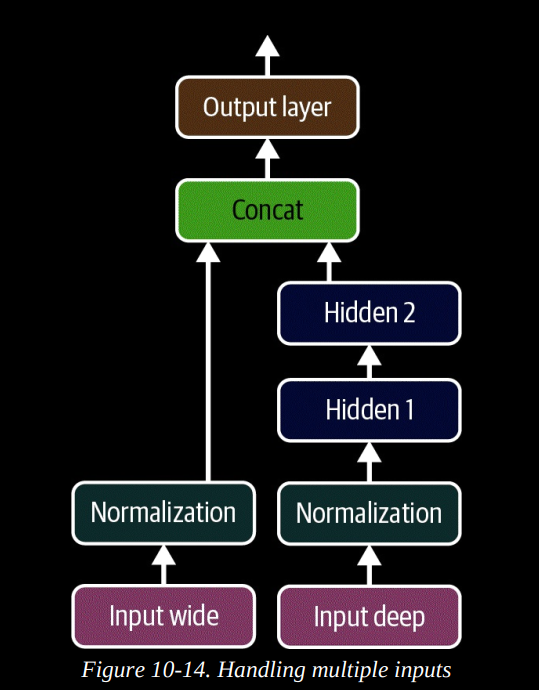

In [6]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=output)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics='RootMeanSquaredError')

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, 
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5039 - root_mean_squared_error: 1.2263 - val_loss: 0.7752 - val_root_mean_squared_error: 0.8805
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5329 - root_mean_squared_error: 0.7300 - val_loss: 0.5992 - val_root_mean_squared_error: 0.7741
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4608 - root_mean_squared_error: 0.6788 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6614
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4188 - root_mean_squared_error: 0.6472 - val_loss: 1.0974 - val_root_mean_squared_error: 1.0476
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3963 - root_mean_squared_error: 0.6295 - val_loss: 2.8992 - val_root_mean_squared_error: 1.7027
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3996 - root_mean_squared_error: 0.6321 - val_loss: 2.2259 - val_

# Building Dynamic Models with the Subclassing API
Thus far we have worked with the sequential and functional APIs, which are declerative in nature. We fully define and instantiate the model structure before feeding it with data. We could instead choose to subclass the tf Model class so that the model can be much more dynamic and respond to different data structures, run loops, and follow conditional logic.

In [8]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(hidden2)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, 'relu', name='my_model')